In [1]:
##### https://en.wikipedia.org/wiki/World_Football_Elo_Ratings

## Basic equation:
# Rn = Ro + P

# P = K*G*(W - We)

# Rn = The new team rating
# Ro = The old team rating
# K = Weight index regarding the tournament of the match
# G = A number from the index of goal differences
# W = The result of the match
# We = The expected result
# P = Points Change

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('C:/Users/Ben/From Mac/Python/FBRef/FBRef Files/ELO/K League 1 ELO Matches.csv')

teams = list(df.Home.unique())
start_elo = 1000
d = {'Team': teams}
team_elo = pd.DataFrame(d)
team_elo['elo'] = start_elo


c = {'Team':[],
     'Date':[],
    'elo':[]}
elo_timeseries = pd.DataFrame(c)


for i in range(len(df)):
    home_team = df.Home[i]
    away_team = df.Away[i]
    date = df.Date[i]

    home_rating = team_elo.at[team_elo.index[team_elo['Team']==home_team].values[0],'elo']
    away_rating = team_elo.at[team_elo.index[team_elo['Team']==away_team].values[0],'elo']
    

    HG = df.HG[i]
    AG = df.AG[i]
    GD = HG-AG



    # K = Weight index regarding the tournament of the match (30 for 'all other matches', 20 friendlies, 40 is EC/EU qualifiers)
    K = 20

    # G = A number from the index of goal differences
    if 0 <= GD <= 1:
        G = 1
    if GD == 2:
        G = 3/2
    if GD >= 3:
        G = (11+GD)/8

    # W = The result of the match
    if GD < 0:
        W = 0
    if GD == 0:
        W = 0.5
    if GD > 0:
        W = 1

    # dr is the difference of the teams' scores
    dr = home_rating - away_rating

    # We = The expected result
    We = 1/(10**(-dr/400)+1)

    # P = Points Change
    P = K*G*(W - We)

    # Rn = The new team rating
    team_elo.at[team_elo.index[team_elo['Team']==home_team].values[0],'elo'] += P
    team_elo.at[team_elo.index[team_elo['Team']==away_team].values[0],'elo'] += -P
    
    new_home = home_rating + P
    new_away = away_rating - P
    
    df['home_rating'][i] = new_home
    df['away_rating'][i] = new_away
    
    new_home_row = {'Team': home_team,
               'Date': date,
               'elo': new_home}
    new_away_row = {'Team': away_team,
               'Date': date,
               'elo': new_away}
    
    elo_timeseries = elo_timeseries.append(new_home_row,ignore_index=True)
    elo_timeseries = elo_timeseries.append(new_away_row,ignore_index=True)
    

team_elo.sort_values(['elo'], ascending=False, inplace=True)
team_elo = team_elo.reset_index(drop=True)
elo_timeseries

elo_timeseries.to_csv('test elo.csv')



NameError: name 'G' is not defined

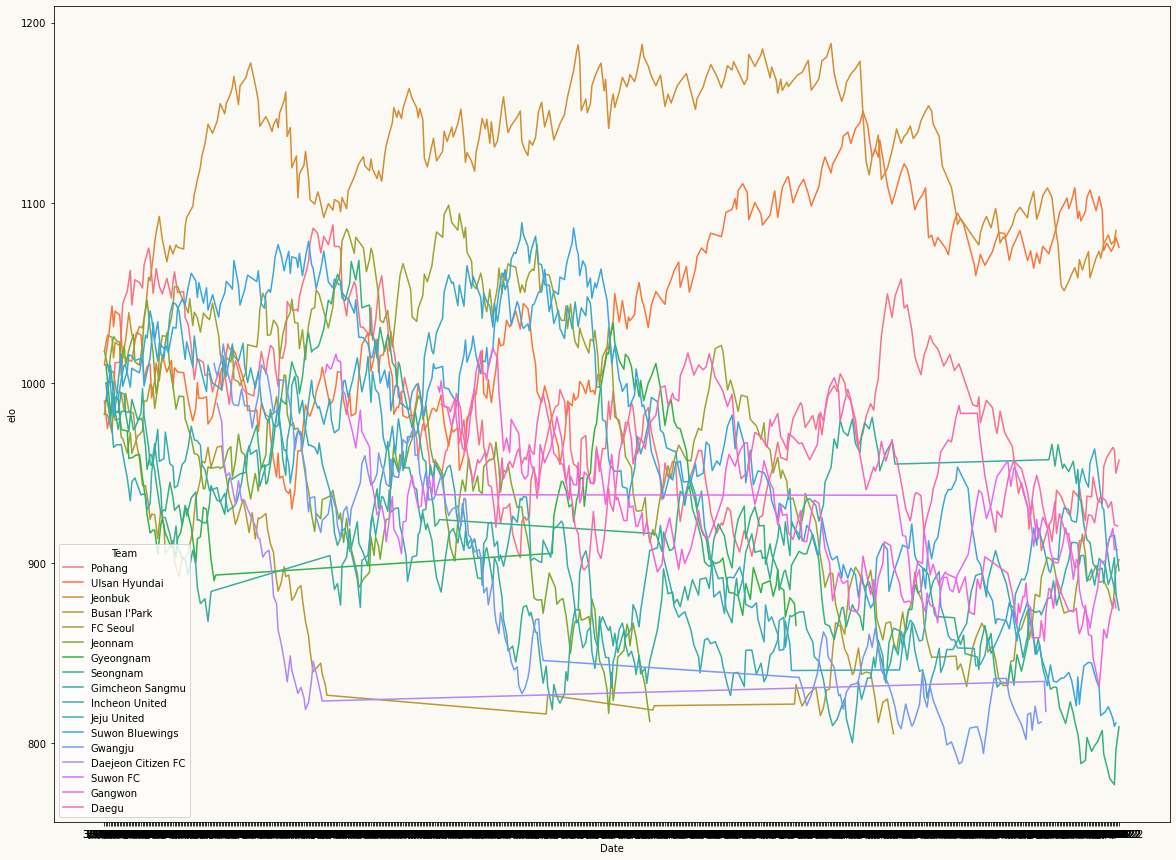

In [38]:
df = pd.read_csv('test elo.csv')

ax = sns.lineplot(data=df, x='Date', y='elo', hue='Team')

ax.set_facecolor('#fbf9f4')

fig = plt.gcf()
fig.set_size_inches(20, 15)

fig.patch.set_facecolor('#fbf9f4')



In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# df = pd.read_csv('C:/Users/Ben/From Mac/Python/FBRef/FBRef Files/ELO/K League 1 ELO Matches.csv')
df = pd.read_csv('https://www.football-data.co.uk/new/JPN.csv')
df['home_rating'] = 0
df['away_rating'] = 0

teams = list(df.Home.unique()) + list(df.Away.unique())
teams = list(set(teams))
start_elo = 1000
d = {'Team': teams}
team_elo = pd.DataFrame(d)
team_elo['elo'] = start_elo


c = {'Team':[],
     'Date':[],
    'elo':[]}
elo_timeseries = pd.DataFrame(c)


for i in range(len(df)):
    home_team = df.Home[i]
    away_team = df.Away[i]
    date = df.Date[i]

#     print(away_team,date)
    home_rating = team_elo.at[team_elo.index[team_elo['Team']==home_team].values[0],'elo']
    away_rating = team_elo.at[team_elo.index[team_elo['Team']==away_team].values[0],'elo']
    

    HG = df.HG[i]
    AG = df.AG[i]
    GD = HG-AG



    # K = Weight index regarding the tournament of the match (30 for 'all other matches', 20 friendlies, 40 is EC/EU qualifiers)
    K = 20

    # G = A number from the index of goal differences
    if 0 <= abs(GD) <= 1:
        G = 1
    if abs(GD) == 2:
        G = 3/2
    if abs(GD) >= 3:
        G = (11+GD)/8

    # W = The result of the match
    if GD < 0:
        W = 0
    if GD == 0:
        W = 0.5
    if GD > 0:
        W = 1

    # dr is the difference of the teams' scores
    dr = home_rating - away_rating

    # We = The expected result
    We = 1/(10**(-dr/400)+1)

    # P = Points Change
    P = K*G*(W - We)

    # Rn = The new team rating
    team_elo.at[team_elo.index[team_elo['Team']==home_team].values[0],'elo'] += P
    team_elo.at[team_elo.index[team_elo['Team']==away_team].values[0],'elo'] += -P
    
    new_home = home_rating + P
    new_away = away_rating - P
    
    df['home_rating'][i] = new_home
    df['away_rating'][i] = new_away
    
    new_home_row = {'Team': home_team,
               'Date': date,
               'elo': new_home}
    new_away_row = {'Team': away_team,
               'Date': date,
               'elo': new_away}
    
    elo_timeseries = elo_timeseries.append(new_home_row,ignore_index=True)
    elo_timeseries = elo_timeseries.append(new_away_row,ignore_index=True)
    

team_elo.sort_values(['elo'], ascending=False, inplace=True)
team_elo = team_elo.reset_index(drop=True)
# elo_timeseries

print('Done')

elo_timeseries.to_csv('test elo japan.csv')



C:\Users\Ben\AppData\Local\Temp/ipykernel_19336/13099656.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_rating'][i] = new_home
C:\Users\Ben\AppData\Local\Temp/ipykernel_19336/13099656.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['away_rating'][i] = new_away


Done


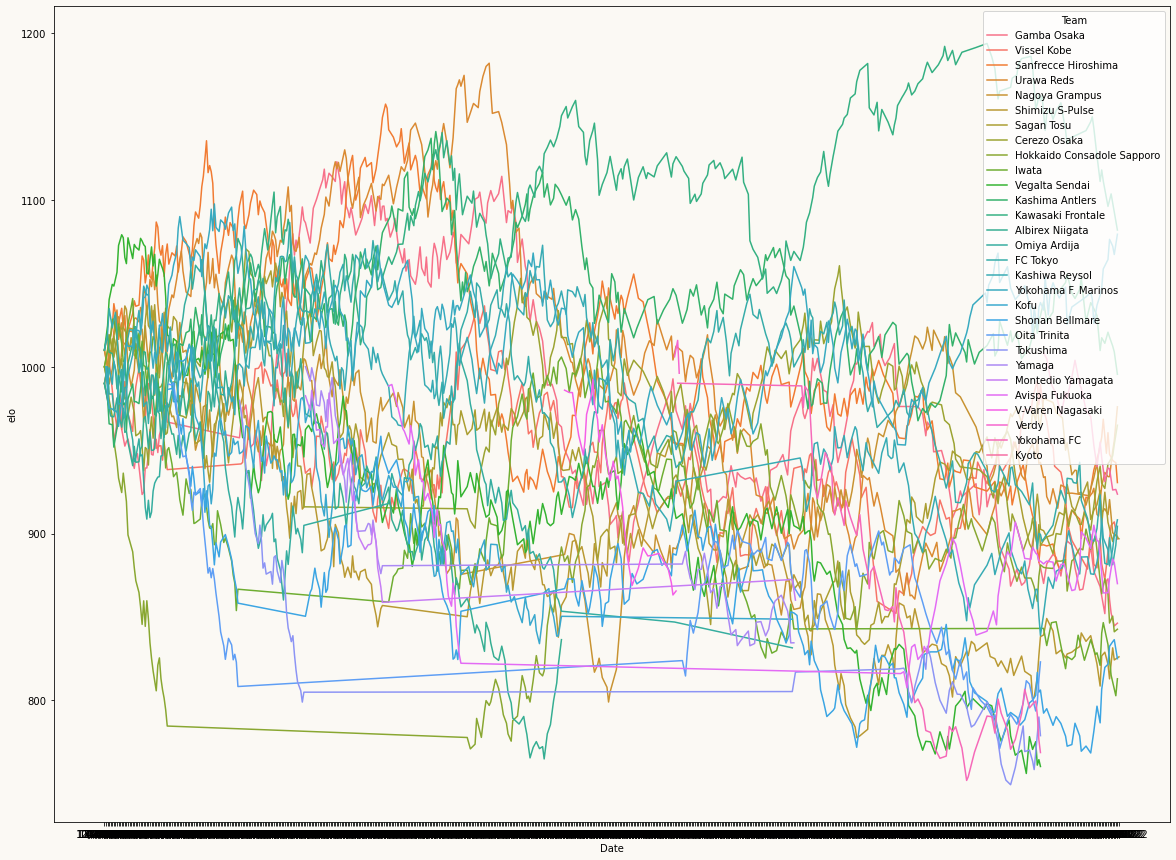

In [18]:
df = pd.read_csv('test elo japan.csv')

ax = sns.lineplot(data=df, x='Date', y='elo', hue='Team')

ax.set_facecolor('#fbf9f4')

fig = plt.gcf()
fig.set_size_inches(20, 15)

fig.patch.set_facecolor('#fbf9f4')



In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('C:/Users/Ben/From Mac/Python/FBRef/FBRef Files/ELO/J1 J2 From 2014.csv')
df.rename(columns={'HomeGoals': "HG", 'AwayGoals': 'AG'}, inplace=True)

df['home_rating'] = 0
df['away_rating'] = 0

teams = list(df.Home.unique()) + list(df.Away.unique())
teams = list(set(teams))

start_elo = 1000
d = {'Team': teams}
team_elo = pd.DataFrame(d)
team_elo['elo'] = start_elo

for i in range(len(teams)):
    index = df[df.Home.str.contains(teams[i])].index[0]
    comp = df.Competition_Name[index]

    if comp == 'J1 League':
        team_elo.at[team_elo.index[team_elo['Team']==teams[i]].values[0],'elo'] = 1000
    if comp == 'J2 League':
        if index > 60:
            team_elo.at[team_elo.index[team_elo['Team']==teams[i]].values[0],'elo'] = 800
        else:
            team_elo.at[team_elo.index[team_elo['Team']==teams[i]].values[0],'elo'] = 900

c = {'Team':[],
     'Date':[],
    'elo':[]}
elo_timeseries = pd.DataFrame(c)


for i in range(len(df)):
    home_team = df.Home[i]
    away_team = df.Away[i]
    date = df.Date[i]

#     print(away_team,date)
    home_rating = team_elo.at[team_elo.index[team_elo['Team']==home_team].values[0],'elo']
    away_rating = team_elo.at[team_elo.index[team_elo['Team']==away_team].values[0],'elo']
    

    HG = df.HG[i]
    AG = df.AG[i]
    GD = HG-AG



    # K = Weight index regarding the tournament of the match (30 for 'all other matches', 20 friendlies, 40 is EC/EU qualifiers)
    K = 20

    # G = A number from the index of goal differences
    if 0 <= abs(GD) <= 1:
        G = 1
    if abs(GD) == 2:
        G = 3/2
    if abs(GD) >= 3:
        G = (11+GD)/8

    # W = The result of the match
    if GD < 0:
        W = 0
    if GD == 0:
        W = 0.5
    if GD > 0:
        W = 1

    # dr is the difference of the teams' scores
    dr = (home_rating + 68) - away_rating

    # We = The expected result
    We = 1/(10**(-dr/400)+1)

    # P = Points Change
    P = K*G*(W - We)

    # Rn = The new team rating
    team_elo.at[team_elo.index[team_elo['Team']==home_team].values[0],'elo'] += P
    team_elo.at[team_elo.index[team_elo['Team']==away_team].values[0],'elo'] += -P
    
    new_home = home_rating + P
    new_away = away_rating - P
    
    df['home_rating'][i] = new_home
    df['away_rating'][i] = new_away
    
    new_home_row = {'Team': home_team,
               'Date': date,
               'elo': new_home}
    new_away_row = {'Team': away_team,
               'Date': date,
               'elo': new_away}
    
    elo_timeseries = elo_timeseries.append(new_home_row,ignore_index=True)
    elo_timeseries = elo_timeseries.append(new_away_row,ignore_index=True)
    

team_elo.sort_values(['elo'], ascending=False, inplace=True)
team_elo = team_elo.reset_index(drop=True)
# elo_timeseries

print('Done')

elo_timeseries.to_csv('test elo japan.csv')



C:\Users\Ben\AppData\Local\Temp/ipykernel_8760/2695195813.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_rating'][i] = new_home
C:\Users\Ben\AppData\Local\Temp/ipykernel_8760/2695195813.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['away_rating'][i] = new_away


Done


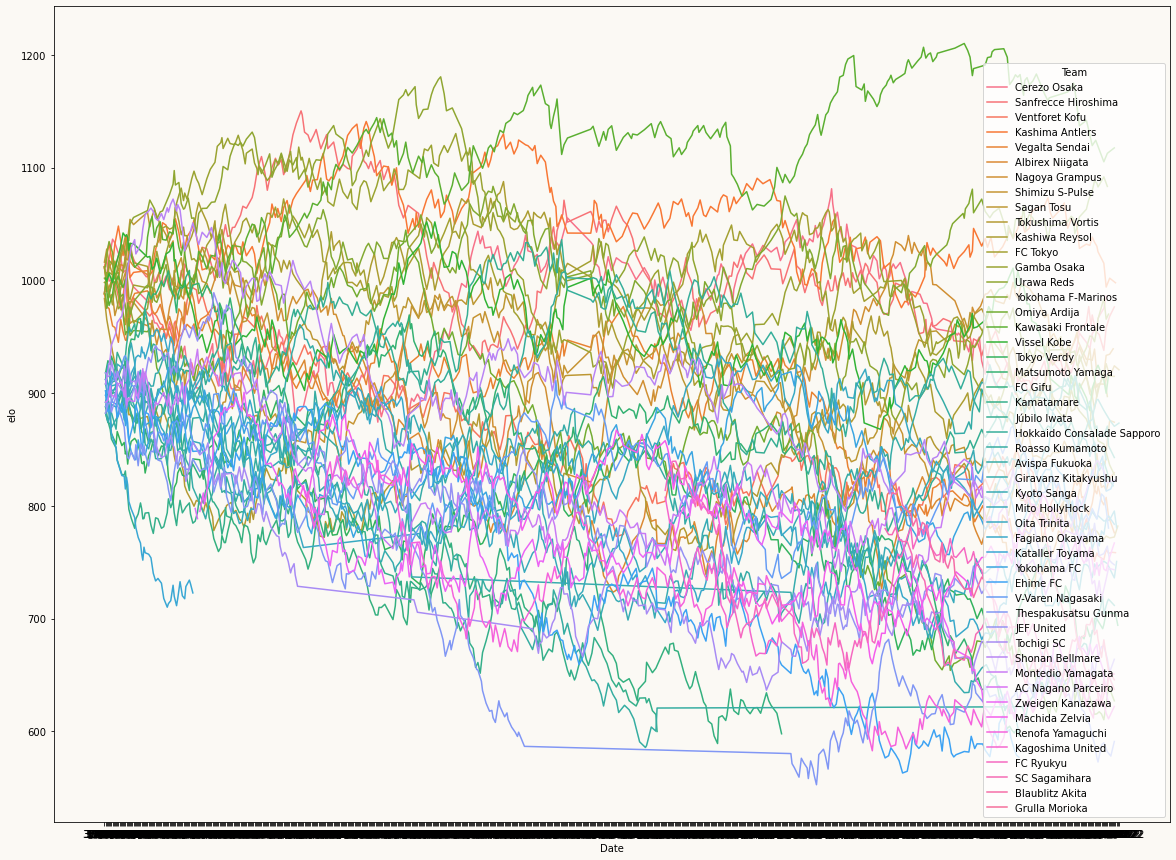

In [12]:
df = pd.read_csv('test elo japan.csv')

ax = sns.lineplot(data=df, x='Date', y='elo', hue='Team')

ax.set_facecolor('#fbf9f4')

fig = plt.gcf()
fig.set_size_inches(20, 15)

fig.patch.set_facecolor('#fbf9f4')



In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('C:/Users/Ben/From Mac/Python/FBRef/FBRef Files/ELO/J Leagues from 1993.csv')
# df.rename(columns={'HomeGoals': "HG", 'AwayGoals': 'AG'}, inplace=True)
df.dropna(subset=['HG'])

df['home_rating'] = 0
df['away_rating'] = 0

teams = list(df.Home.unique()) + list(df.Away.unique())
teams = list(set(teams))

start_elo = 1000
d = {'Team': teams}
team_elo = pd.DataFrame(d)
team_elo['elo'] = start_elo

for i in range(len(teams)):
    try:
        index = df[df.Home.str.contains(teams[i])].index[0]
    except:
        index = df[df.Away.str.contains(teams[i])].index[0]
    comp = df.Tournament[index]
#     print(teams[i],',',index,',',comp)

    if comp == 'J1':
        team_elo.at[team_elo.index[team_elo['Team']==teams[i]].values[0],'elo'] = 1000
    if comp == 'J2':
        if index > 1672:
            team_elo.at[team_elo.index[team_elo['Team']==teams[i]].values[0],'elo'] = 800
        else:
            team_elo.at[team_elo.index[team_elo['Team']==teams[i]].values[0],'elo'] = 900
    if comp == 'J3':
        if index > 10681:
            team_elo.at[team_elo.index[team_elo['Team']==teams[i]].values[0],'elo'] = 600
        else:
            team_elo.at[team_elo.index[team_elo['Team']==teams[i]].values[0],'elo'] = 700

c = {'Team':[],
     'Date':[],
    'elo':[]}
elo_timeseries = pd.DataFrame(c)


for i in range(len(df)):
    home_team = df.Home[i]
    away_team = df.Away[i]
    date = df.Date[i]

#     print(away_team,date)
    home_rating = team_elo.at[team_elo.index[team_elo['Team']==home_team].values[0],'elo']
    away_rating = team_elo.at[team_elo.index[team_elo['Team']==away_team].values[0],'elo']
    

    HG = df.HG[i]
    AG = df.AG[i]
    GD = HG-AG



    # K = Weight index regarding the tournament of the match (30 for 'all other matches', 20 friendlies, 40 is EC/EU qualifiers)
    K = 20

    # G = A number from the index of goal differences
    if 0 <= abs(GD) <= 1:
        G = 1
    if abs(GD) == 2:
        G = 3/2
    if abs(GD) >= 3:
        G = (11+GD)/8

    # W = The result of the match
    if GD < 0:
        W = 0
    if GD == 0:
        W = 0.5
    if GD > 0:
        W = 1

    # dr is the difference of the teams' scores
    dr = (home_rating + 68) - away_rating

    # We = The expected result
    We = 1/(10**(-dr/400)+1)

    # P = Points Change
    P = K*G*(W - We)

    # Rn = The new team rating
    team_elo.at[team_elo.index[team_elo['Team']==home_team].values[0],'elo'] += P
    team_elo.at[team_elo.index[team_elo['Team']==away_team].values[0],'elo'] += -P
    
    new_home = home_rating + P
    new_away = away_rating - P
    
    df['home_rating'][i] = new_home
    df['away_rating'][i] = new_away
    
    new_home_row = {'Team': home_team,
               'Date': date,
               'elo': new_home}
    new_away_row = {'Team': away_team,
               'Date': date,
               'elo': new_away}
    
    elo_timeseries = elo_timeseries.append(new_home_row,ignore_index=True)
    elo_timeseries = elo_timeseries.append(new_away_row,ignore_index=True)
    

team_elo.sort_values(['elo'], ascending=False, inplace=True)
team_elo = team_elo.reset_index(drop=True)
# elo_timeseries

comp_look = pd.read_csv('C:/Users/Ben/From Mac/Python/FBRef/FBRef Files/ELO/J Leagues from 1993.csv')
elo_timeseries['Current League']=''
for i in range(len(elo_timeseries)):
    try:
        elo_timeseries['Current League'][i] = comp_look[comp_look['Away']==elo_timeseries.Team[i]].Tournament.tolist()[-1]
    except:
        elo_timeseries['Current League'][i] = comp_look[comp_look['Home']==elo_timeseries.Team[i]].Tournament.tolist()[-1]

print('Done')

elo_timeseries.to_csv('test elo japan from 93.csv')



C:\Users\Ben\AppData\Local\Temp/ipykernel_24492/2537035462.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_rating'][i] = new_home
C:\Users\Ben\AppData\Local\Temp/ipykernel_24492/2537035462.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['away_rating'][i] = new_away
C:\Users\Ben\AppData\Local\Temp/ipykernel_24492/2537035462.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elo_timeseries['Current League'][i] = 

Done


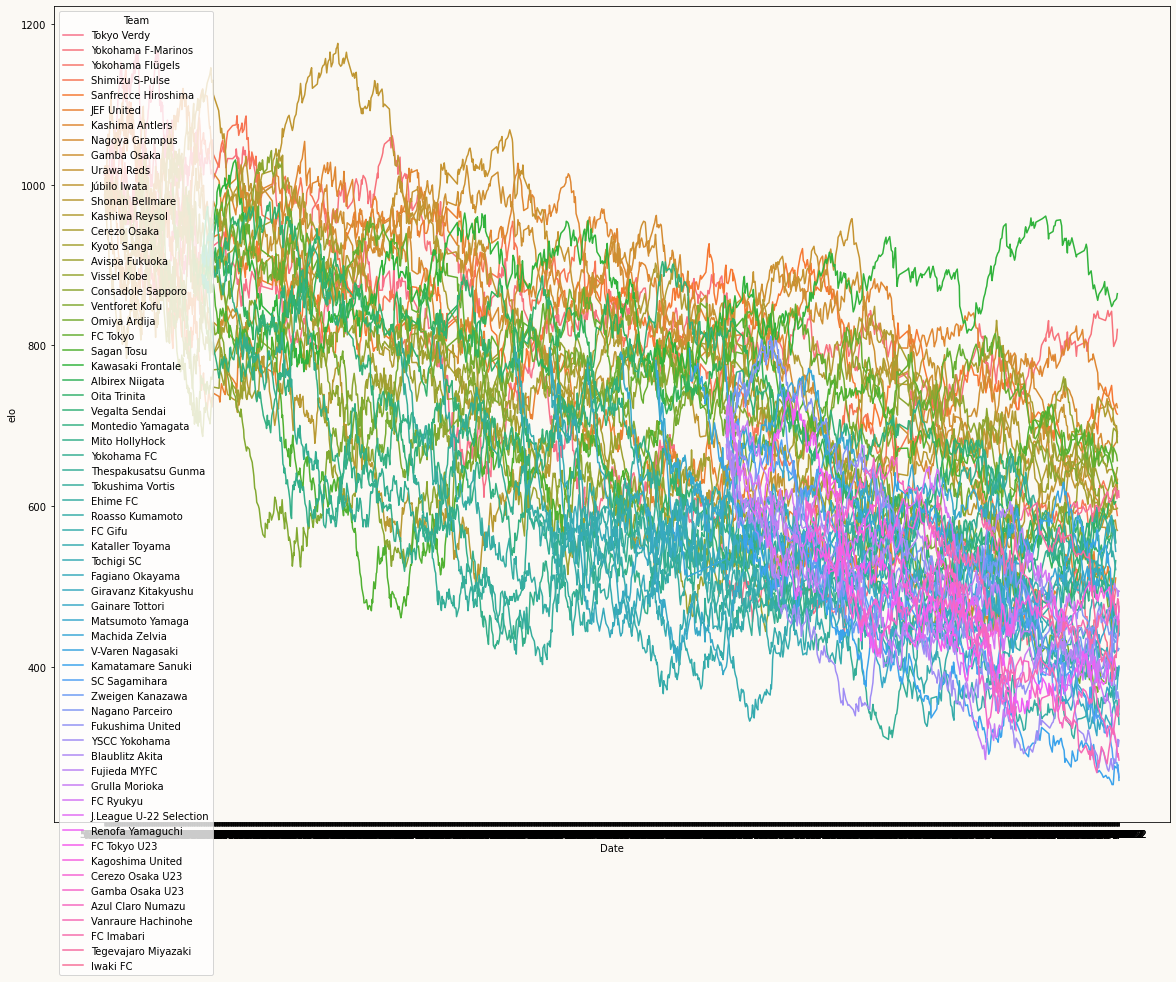

In [2]:
df = pd.read_csv('test elo japan from 93.csv')

ax = sns.lineplot(data=df, x='Date', y='elo', hue='Team')

ax.set_facecolor('#fbf9f4')

fig = plt.gcf()
fig.set_size_inches(20, 15)

fig.patch.set_facecolor('#fbf9f4')



In [3]:
elo_timeseries

,Team,Date,elo,Current League
0,Tokyo Verdy,5/15/1993,988.067417,J2
1,Yokohama F-Marinos,5/15/1993,1011.932583,J1
2,Yokohama Flügels,5/16/1993,1008.067417,J1
3,Shimizu S-Pulse,5/16/1993,991.932583,J1
4,Sanfrecce Hiroshima,5/16/1993,1008.067417,J1
...,...,...,...,...
39823,Tegevajaro Miyazaki,11/20/2022,456.466018,J3
39824,Matsumoto Yamaga,11/20/2022,441.033705,J3
39825,SC Sagamihara,11/20/2022,261.966295,J3
39826,Gainare Tottori,11/20/2022,400.668975,J3
